Using TensorFlow backend.


Train: 1.000, Test: 0.914


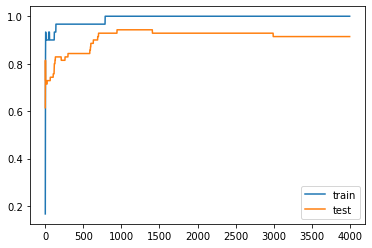

In [18]:
# mlp overfit on the moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [22]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold

# dataset file
datasetFileName = "pima-indians-diabetes.data.csv"

# initialize random number generator
seed = 7
numpy.random.seed(seed)

# load data
dataset = numpy.loadtxt(datasetFileName, delimiter=",")

# split dataset into input and output variables
X = dataset[:, 0:8]
Y = dataset[:, 8]

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

# define base model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


for train, test in kfold.split(X, Y):
    # create the model
    model = create_model()

    # train the model
    model.fit(X[train], Y[train], epochs=150, batch_size=10, verbose=0)

    # evauate the model
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("\nAccuracy: %.2f%% \n" % (scores[1]*100))
    cvscores.append(scores[1]*100)


print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))


Accuracy: 74.03% 


Accuracy: 80.52% 


Accuracy: 72.73% 


Accuracy: 68.83% 


Accuracy: 67.53% 



KeyboardInterrupt: 

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 25s 2ms/step - loss: 0.5041 - accuracy: 0.7838 - val_loss: 0.3895 - val_accuracy: 0.8598
Epoch 2/20
15000/15000 [==============================] - 9s 585us/step - loss: 0.2952 - accuracy: 0.9092 - val_loss: 0.3093 - val_accuracy: 0.8809
Epoch 3/20
15000/15000 [==============================] - 7s 472us/step - loss: 0.2171 - accuracy: 0.9287 - val_loss: 0.2846 - val_accuracy: 0.8873
Epoch 4/20
15000/15000 [==============================] - 6s 394us/step - loss: 0.1740 - accuracy: 0.9416 - val_loss: 0.2848 - val_accuracy: 0.8846
Epoch 5/20
15000/15000 [==============================] - 7s 496us/step - loss: 0.1391 - accuracy: 0.9578 - val_loss: 0.2801 - val_accuracy: 0.8874
Epoch 6/20
15000/15000 [==============================] - 7s 439us/step - loss: 0.1180 - accuracy: 0.9644 - val_loss: 0.2953 - val_accuracy: 0.8866
Epoch 7/20
15000/15000 [==============================] - 6s 42

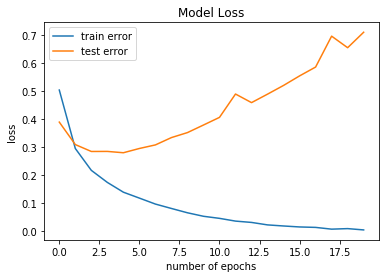

{'name': 'dense_27', 'trainable': True, 'batch_input_shape': (None, 10000), 'dtype': 'float32', 'units': 16, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
[array([[ 0.01318977,  0.0083934 , -0.00236019, ...,  0.0119398 ,
         0.00023673, -0.01222793],
       [ 0.01693313,  0.01773722,  0.02702699, ...,  0.01269653,
         0.0355617 ,  0.01628414],
       [ 0.00430434,  0.02263182, -0.00869727, ...,  0.01246626,
         0.04625865, -0.00256414],
       ...,
       [ 0.00604379,  0.03468055,  0.01656756, ...,  0.01366257,
         0.00105164, -0.03399571],
       [-0.04191276, -0.0337993 , -0.01963205, ..., -0.01985288,
         0.02417463,  0.04725879],


In [25]:
import numpy as numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import imdb
import matplotlib.pyplot as plt

# initialize random number generator
seed = 7
numpy.random.seed(seed)

# encoding integer sequesnce into binary matrix
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = numpy.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # set specific indices of results[i] to 1s
        results[i, sequence] = 1.
    return results

def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, activation='relu', input_shape=(10000,)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    model.compile(loss='binary_crossentropy', optimizer='rmsprop',
                  metrics=['accuracy'])
    return model

# import imdb records
(train_data, train_labels), (test_data, test_labels) = \
    imdb.load_data( num_words=10000)

# Dataset preparation
# Vectorize training data
x_train = vectorize_sequences(train_data)
# Vectorize training labels
y_train = numpy.asarray(train_labels).astype('float32')

# Vectorize test data
x_test = vectorize_sequences(test_data)
# Vectorize test labels
y_test = numpy.asarray(test_labels).astype('float32')

# create validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Now as we have prepared our training dataset and validation
# dataset lets create the model and run the training
model = create_model()
history = model.fit(partial_x_train, partial_y_train, epochs=20,
                    batch_size=512, validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']

epochs = range(1, len(acc) + 1)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.legend(['train error', 'test error'], loc='upper left')
plt.show()

for layer in model.layers:
    g=layer.get_config()
    h=layer.get_weights()
    print (g)
    print (h)
